# Problem Set 3
## Learning from data [TIF285], Chalmers, Fall 2019

Last revised: 09-Oct-2019 by Christian Forssén [christian.forssen@chalmers.se]

## Instructions

- See deadline on the course web page
- This problem set is performed individually (but collaboration is encouraged) and contains a number of basic and extra problems; you can choose which and how many to work on.
- See examination rules on the course web page.
- Hand-in is performed through the following **two** actions:
  - Upload of your solution in the form of a jupyter notebook, or python code, via Canvas.
  - Answer the corresponding questions on OpenTA.
  
  Note that the hand-in is not complete, and will not be graded, if any of those actions is not performed.

Fill your personal details
- Name: **Holmin, Sebastian**
- Personnummer: **970602-3679**
  <br/>
  (civic registration number)

## Problems
The 10 basic points of this problem set are distributed over four problems:
1. Assigning probabilities for a hundred-sided die (2 basic points)
2. Chi-squared hypothesis testing (2 basic points)
3. Gaussian process regression (3 basic points)
4. Neural network classification (3 basic points)

Each of them will be presented in a separate jupyter notebook.

## Problem 2: Chi-squared hypothesis testing
### (2 basic points)

Assume that you are analyzing a time series of data from an experiment that is searching for an annual modulation on top of a constant background (e.g. a modulation that would be proportional to the flux of dark matter particles which is expected to have an annual modulation). 

The time series of data consists of $N = 20$ measurements that extends over a period of 5 years. The measurements are presented in some re-scaled, dimensionless units. From calibration measurements it is known that errors are statistically distributed with a standard variance $\sigma = 5.0$.

### Tasks
* Create data according to the cell below using three different scenarios: the amplitude of the annual modulation signal (as given by the `amp_annual` variable) being 
  * 0.0
  * 5.0
  * 10.0
* Consider as a null hypothesis that the signal is *constant*, with an unknown amplitude.
* Compute, for each case, the chi-squared statistics: $\chi^2 = \sum_{i=1}^N \frac{( y_i - \bar{y} )^2}{\sigma^2}$, where the average value $\bar{y}$ is estimated from the sample $\{ y_i \}_{i=1}^{N}$.
* Make a plot of the expected $\chi^2$ distribution for the relevant number of degrees of freedom and compare with the statistic obtained for the actual data in each case.
* What is the *P-value* or *significance* of the data (for each case) from a frequentist point of view?
* What is your *confidence in rejecting the null hypothesis* for each particular case.

Finally, you are encouraged to play around and generate data for the same three scenarios but with another random seed. E.g. try with the seed `2019` instead of `1` used in the `np.random.RandomState(1)` initialization in the cell below. What is the outcome of the analysis of these new data sets?

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
from scipy.stats import chi2

In [66]:
# Generate N=20 data points for a period of Y=5 years
N = 20
Y = 5
T = 365.25
rand = np.random.RandomState(1)
t = T * Y * rand.rand(N)

# The constant background
background = 100.

# The std deviation for the normally distributed errors
dy = 5.

# amplitude of annual modulation signal
amp_annual = 5.

y = background + amp_annual * np.sin(2*np.pi*t / T)
y += dy * rand.randn(N)

Chi2 =  20.305858766954238
P =  0.37638873721442334
Confidence of rejecting null hypothesis =  0.6236112627855767


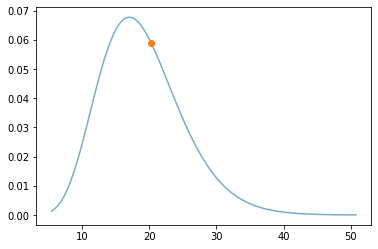

In [67]:
ybar = np.mean(y)

chi2meas = sum((y-ybar)**2/dy**2)
print("Chi2 = ",chi2meas)
fig, ax = plt.subplots(1, 1)

df = 19 # We lose one degree of freedom from normalization
x = np.linspace(chi2.ppf(0.001, df),
                chi2.ppf(0.9999, df), 100)
ax.plot(x, chi2.pdf(x, df), alpha=0.6, label='chi2 pdf')
ax.plot(chi2meas,chi2.pdf(chi2meas,df),'o')

P = 1- chi2.cdf(chi2meas,df)
print("P = ",P)
print("Confidence of rejecting null hypothesis = ", 1-P)